In [37]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

import os
os.chdir('../')

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import norm

import xgboost as xgb
from lightgbm import LGBMClassifier


In [2]:
os.getcwd()

'/Users/b05348/Documents/proyectos/diplomatura/diplomatura'

In [3]:
train = pd.read_csv("./data/titanic/02 - preprocesada/train.csv")

In [4]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,titulo_Master,titulo_Miss,titulo_Mr,titulo_Mrs,titulo_Officer,titulo_Royalty,decilesEdad_0,decilesEdad_1,decilesEdad_2,decilesEdad_3,decilesEdad_4,decilesEdad_5,decilesEdad_6,decilesEdad_7,decilesEdad_8,decilesEdad_9,labelEncoderEmbarked
0,1,0.0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2
1,2,1.0,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,1.0,26.0,0,0,7.9250,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2
3,4,1.0,35.0,1,0,53.1000,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2
4,5,0.0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2


In [5]:
X = train.drop(columns = ["Survived", "PassengerId"])
y = train.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)

(596, 26)
(295, 26)


## Boosting
El boosting es un ensamble de *learners* débiles (generalmente árboles de decisión) que trabajan en conjunto para poder lograr resultados mucho más robustos en su conjunto. 
La forma en que se generan es secuencial, es decir, se genera un árbol de, el mismo es evaluado, luego se generan *pesos* en cada una de las observaciones, las observaciones que fueron érroneas en sus predicciones, se les dará mayor peso, las que fueron acertadas, menor. Esto se hace para que el árbo siguiente haga más hincapié en aquellas observaciones que fueron mal predichas.

Existen varias implementaciones de este algoritmo:

* XGBoost (Extreme Gradient Boosting): Es uno de los algoritmos que estuvo dominando las competencias de data mining a nivel global. Creado por Tianqui Chen y Carlos Guestrin, logra muy buenos resultados y excelentes generalizaciones. En el siguiente [link](https://xgboost.readthedocs.io/en/latest/) podrán encontrar toda su documentación.
* LightGBM: 

Los parámetros para ajustar del **XGBoost** son:

* base_score: Este parámetro es el score que se le asigna inicialmente a todas las predicciones.
* Booster: Este parámetro nos indica que se desea usar como *learner* base. Las tres opciones de este algoritmo son: gbtree, dart (ambos se basan en árboles) y gblinear (funciones lineales)
* colsample_bylevel: Se realiza un muestreo de las columnas a elegir encada uno de los niveles del árbol. Es decir, cada vez que crece un nivel el árbol, se elije una característica de una submuestra.
* colsample_bynode: Por cada nodo del árbol se realiza una muestra de las posibles variables para elegir y realizar un nuevo corte.
* colsample_bytree: Por cada árbol nuevo, se realiza una selección de variables.
* gamma: Es igual al min_split_loss. Es la mínima reducción de pérdidas que se requiere para poder realizar un nuevo split en un nodo hoja. Cuanto más alto sea el valor de gamma, más conservador será el árbol. 
* importance_type: Es el tipo de feature importance. Los valores son gain, weight o total_gain.
* learning_rate: Es la tasa de aprendizaje. Si el valor es muy chico, los pasos para buscar los mínimos de las funciones serán más cortos, si el valor es muy grande, los pasos serán más largos.
* max_delta_step: Es el máximo delta que se puede tener cuando se estimen los pesos de los árboles.
* max_depth: Profundidad máxima de los árboles bases.
* missing: El valor con el que se completarán los valores faltantes.
* n_estimators: Cantidad de *learners* base que tendrá el modelo final.
* n_jobs: Número de jobs (threads) que correrán en paralelo.
* random_state: Valor de la semilla para que puedan ser reproducidos los resultados.
* reg_alpha: Regularización L1.
* reg_lambda: Regularización L2.
* scale_pos_weight: Balanceo entre los pesos de las clases positivas o negativas.
* subsample: Es un ratio de muestreo para las instancias de entrenamiento.
* verbosity: Valor por default=1. Este parámetro nos indicará que mensajes se mostrarán por pantalla. El valor 0 indica falta de mensajes, 1 solo advertencias, 2 información, 3 información de debug. 

In [10]:
learner = xgb.XGBClassifier()
learner.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
predictionsProbabilities = learner.predict_proba(X_test)
predictions = learner.predict(X_test)

In [19]:
accuracy_score(y_test, predictions)

0.7830508474576271

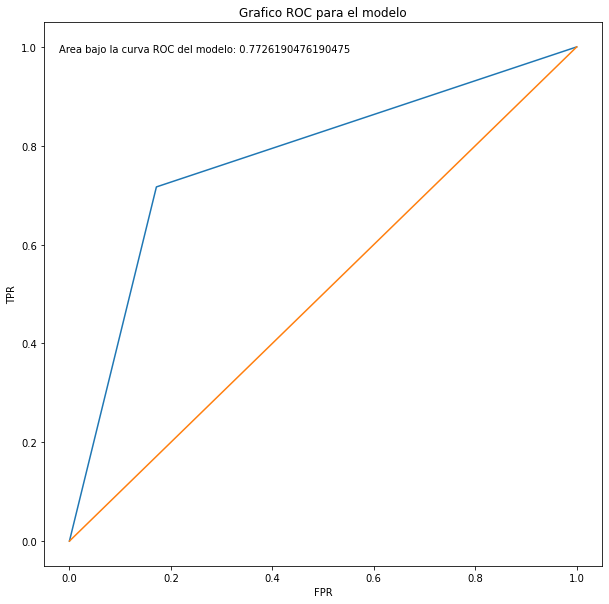

In [20]:
areaBajoCurvaRoc = roc_auc_score(y_test, predictions)
fpr, tpr, _ = roc_curve(y_test, predictions)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()

([<matplotlib.axis.XTick at 0x7f91cd826f50>,
 [Text(0, 0, 'Sex_female'),
  Text(1, 0, 'Pclass_3'),
  Text(2, 0, 'titulo_Mr'),
  Text(3, 0, 'titulo_Officer'),
  Text(4, 0, 'decilesEdad_1'),
  Text(5, 0, 'decilesEdad_7'),
  Text(6, 0, 'titulo_Miss'),
  Text(7, 0, 'SibSp'),
  Text(8, 0, 'labelEncoderEmbarked'),
  Text(9, 0, 'Pclass_1'),
  Text(10, 0, 'titulo_Master'),
  Text(11, 0, 'Fare'),
  Text(12, 0, 'decilesEdad_6'),
  Text(13, 0, 'Age'),
  Text(14, 0, 'Parch'),
  Text(15, 0, 'decilesEdad_3'),
  Text(16, 0, 'decilesEdad_5'),
  Text(17, 0, 'Pclass_2'),
  Text(18, 0, 'decilesEdad_8'),
  Text(19, 0, 'decilesEdad_2')])

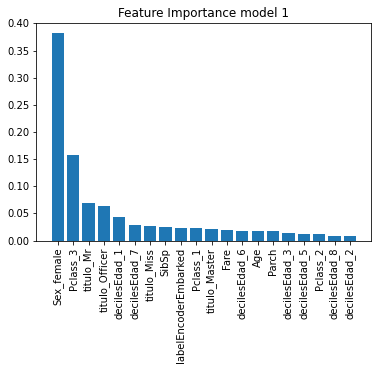

In [26]:
importances = learner.feature_importances_
importances = importances / importances.sum()
indices = np.argsort(importances)[::-1][0:20]
names = [X_train.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance model 1")
plt.bar(range(len(names)), importances[indices])
plt.xticks(range(len(names)), names, rotation=90)


LightGBM es una implementación de Boosting creada por Microsoft. Para ciertos problemas puede ser mucho más performante que la implementación de XGBoost.
Los parámetros son:
* boosting_type: Tipo de boosting, el que utiliza por default es gbdt, que es el clásico gradient boosting decision tree.
* num_leaves: es el máximo número de hojas que pueden tener los árboles base.
* max_depth: Máxima profundidad que pueden tener los árboles base.
* learning_rate: Es la tasa de aprendizaje. Si el valor es muy chico, los pasos para buscar los mínimos de las funciones serán más cortos, si el valor es muy grande, los pasos serán más largos.
* n_estimators: Cantidad de *learners* base que tendrá el modelo final.
* class_weight: Este parámetro es un diccionario, en done cada key será la clase, y el valor será la proporción que posee de target.
* min_split_gain: Es la mímina reducción del error que se necesita para que un nodo hoja se divida.
* min_child_samples: Mínima cantidad de observaciones que tiene que tener una hoja.
* subsample: Este parámetro sirve para que cada árbol se entrene con una submuestra de la base de entrenamiento.
* colsample_bytree: Por cada árbol nuevo, se realiza una selección de variables.
* reg_alpha: Regularización L1.
* reg_lambda: Regularización L2.
* n_jobs: Número de jobs (threads) que correrán en paralelo.
* random_state: Valor de la semilla para que puedan ser reproducidos los resultados.
* silent: Se utiliza para mostrar o no mensajes mientras se entrena.
* importance_type: Es el tipo de feature importance. Los valores son gain, weight o total_gain.


In [39]:
lgbm = LGBMClassifier()

In [58]:
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [60]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

([<matplotlib.axis.XTick at 0x7f91ce45fa90>,
 [Text(0, 0, 'Fare'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'labelEncoderEmbarked'),
  Text(3, 0, 'SibSp'),
  Text(4, 0, 'Pclass_3'),
  Text(5, 0, 'Parch'),
  Text(6, 0, 'decilesEdad_3'),
  Text(7, 0, 'Sex_female'),
  Text(8, 0, 'titulo_Mr'),
  Text(9, 0, 'titulo_Mrs'),
  Text(10, 0, 'decilesEdad_5'),
  Text(11, 0, 'Pclass_2'),
  Text(12, 0, 'titulo_Miss'),
  Text(13, 0, 'Pclass_1'),
  Text(14, 0, 'Sex_male'),
  Text(15, 0, 'decilesEdad_1'),
  Text(16, 0, 'titulo_Master'),
  Text(17, 0, 'decilesEdad_8'),
  Text(18, 0, 'decilesEdad_6'),
  Text(19, 0, 'decilesEdad_7')])

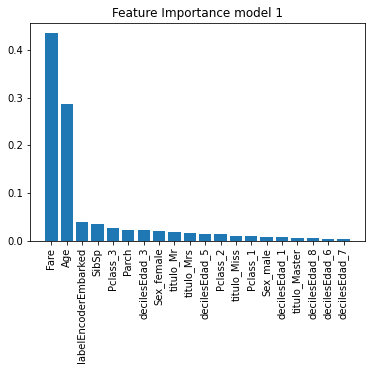

In [57]:
importances = lgbm.feature_importances_
importances = importances / importances.sum()
indices = np.argsort(importances)[::-1][0:20]
names = [X_train.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance model 1")
plt.bar(range(len(names)), importances[indices])
plt.xticks(range(len(names)), names, rotation=90)